In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import math
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode(connected=True)

* d1 is the Overall Data for the past years since 2007
* d2 is the scores of key statistics
* d3 refers to the Changes in happiness scores
* d4 refers to the Average happiness of foreign born
* d5 refers to the Supporting factors

In [108]:
d1 = pd.read_excel("Data/World Happiness Report/WHR2018.xlsx", sheet_name='Table2.1')
d2 = pd.read_excel("Data/World Happiness Report/WHR2018.xlsx", sheet_name='Figure2.2')
d3 = pd.read_excel("Data/World Happiness Report/WHR2018.xlsx", sheet_name='Figure2.3')
d4 = pd.read_excel("Data/World Happiness Report/WHR2018.xlsx", sheet_name='Figure2.4')
d5 = pd.read_excel("Data/World Happiness Report/WHR2018.xlsx", sheet_name='SupportingFactors')

In [109]:
print("(No. of countries, No. of columns) =", d1.shape)
d1 = d1.rename(columns={'country':'Country'})
# d1['Average'] = d1.groupby('Country')['Life Ladder'].transform('mean')
# d1['Rank'] = d1['Average'].rank(method='dense', ascending=False)
d1.head()

(No. of countries, No. of columns) = (1562, 19)


,Country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


In [110]:
print("(No. of countries, No. of columns) =", d2.shape)
d2 = d2.iloc[0:157, 0:11].sort_values(by=['Country']).reset_index(drop=True)
d2.head()

(No. of countries, No. of columns) = (157, 24)


,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.92) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Afghanistan,3.6315,3.714525,3.548475,2.195918,0.331814,0.537191,0.254772,0.084552,0.191004,0.036268
1,Albania,4.5860,4.695393,4.476607,1.462148,0.915782,0.817405,0.790387,0.418669,0.149213,0.032436
2,Algeria,5.2946,5.406491,5.182709,2.208535,0.978857,1.153656,0.686599,0.077280,0.055195,0.134517
3,Angola,3.7948,3.951442,3.638158,1.530531,0.730157,1.125020,0.268986,0.000000,0.078868,0.061276
4,Argentina,6.3880,6.485014,6.290986,2.418201,1.072671,1.468341,0.743585,0.569710,0.061942,0.053507


In [111]:
print("(No. of countries, No. of columns) =", d3.shape)
d3= d3.sort_values(by=['Country']).reset_index(drop=True)
d3.head()

(No. of countries, No. of columns) = (141, 4)


,Country,Changes in happiness scores,Whisker-high,Whisker-low
0,Afghanistan,-0.688338,-0.579448,-0.797228
1,Albania,-0.791441,-0.640828,-0.942054
2,Algeria,-0.168929,-0.008211,-0.329647
3,Argentina,0.112430,0.247466,-0.022607
4,Armenia,-0.078384,0.046207,-0.202976


In [112]:
print("(No. of countries, No. of columns) =", d4.shape)
d4= d4.sort_values(by=['Country']).reset_index(drop=True)
d4.head()

(No. of countries, No. of columns) = (117, 5)


,Country,Average happiness of foreign born,Whisker-high,Whisker-low,Average happiness of locally born
0,Afghanistan,4.068487,4.268106,3.868869,3.853136
1,Argentina,5.843226,6.077020,5.609432,6.439717
2,Armenia,4.100641,4.261732,3.939550,4.417696
3,Australia,7.249348,7.331693,7.167004,7.323904
4,Austria,6.902624,7.076249,6.728999,7.260852


In [113]:
print("(No. of countries, No. of columns) =", d5.shape)
d5 = d5.sort_values(by=['country']).reset_index(drop=True)
d5 = d5.rename(columns={'country':'Country'})
d5.head()

(No. of countries, No. of columns) = (156, 15)


,Country,Region indicator,"Life ladder, 2015-2017","Standard error, life ladder, 2015-2017","Log of GDP per person, 2015-2017","GDP per person, 2015-2017","Healthy life expectancy, 2015-2017","Social support, 2015-2017","Standard error, social support, 2015-2017","Freedom to make life choices, 2015-2017","Standard error, freedom to make life choices, 2015-2017","Generosity, 2015-2017, without adjustment for GDP per person","Standard error, generosity, 2015-2017","Perceptions of corruption, 2015-2017","Standard error, perceptions of corruption, 2015-2017"
0,Afghanistan,South Asia,3.631519,0.042360,7.462610,1741.687500,52.013329,0.525075,0.011119,0.445294,0.011449,0.179054,0.008331,0.879705,0.006009
1,Albania,Central and Eastern Europe,4.586040,0.055813,9.338126,11363.095703,68.871552,0.639576,0.010078,0.726340,0.009421,0.259975,0.009048,0.886778,0.005775
2,Algeria,Middle East and North Africa,5.294638,0.057087,9.540703,13914.723633,65.604858,0.776977,0.011171,0.439177,0.019161,0.128988,0.012327,0.698343,0.019293
3,Angola,Sub-Saharan Africa,3.794838,0.079919,8.741957,6260.132812,52.460709,0.765275,0.015744,0.374173,0.018346,0.106829,0.011499,0.833540,0.016014
4,Argentina,Latin America and Caribbean,6.387958,0.049497,9.842001,18807.310547,67.398483,0.905565,0.006363,0.853390,0.007526,0.163174,0.007777,0.847882,0.006881


In [114]:
data = pd.merge(d5, d2, on='Country')
data = pd.merge(data, d4, on='Country')
Main_Data = pd.merge(data, d3, on='Country')

newcol_Rank = Main_Data['Happiness score'].rank(method='dense', ascending=False)
Main_Data.insert(loc=2, column='Rank', value=newcol_Rank)

In [115]:
Main_Data.head()

,Country,Region indicator,Rank,"Life ladder, 2015-2017","Standard error, life ladder, 2015-2017","Log of GDP per person, 2015-2017","GDP per person, 2015-2017","Healthy life expectancy, 2015-2017","Social support, 2015-2017","Standard error, social support, 2015-2017",...,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Average happiness of foreign born,Whisker-high_y,Whisker-low_y,Average happiness of locally born,Changes in happiness scores,Whisker-high,Whisker-low
0,Afghanistan,South Asia,100.0,3.631519,0.042360,7.462610,1741.687500,52.013329,0.525075,0.011119,...,0.084552,0.191004,0.036268,4.068487,4.268106,3.868869,3.853136,-0.688338,-0.579448,-0.797228
1,Argentina,Latin America and Caribbean,28.0,6.387958,0.049497,9.842001,18807.310547,67.398483,0.905565,0.006363,...,0.569710,0.061942,0.053507,5.843226,6.077020,5.609432,6.439717,0.112430,0.247466,-0.022607
2,Armenia,Commonwealth of Independent States,89.0,4.320565,0.046600,9.018902,8257.704102,64.962479,0.710185,0.009443,...,0.260100,0.077052,0.027643,4.100641,4.261732,3.939550,4.417696,-0.078384,0.046207,-0.202976
3,Australia,North America and ANZ,10.0,7.272051,0.044063,10.700419,44374.464844,72.650299,0.948141,0.005685,...,0.646526,0.361005,0.302352,7.249348,7.331693,7.167004,7.323904,-0.079471,0.046760,-0.205702
4,Austria,Western Europe,12.0,7.139362,0.035739,10.704917,44574.488281,72.049568,0.920177,0.005735,...,0.617242,0.242011,0.223820,6.902624,7.076249,6.728999,7.260852,-0.122659,-0.019036,-0.226282


In [116]:
Main_Data.tail()

,Country,Region indicator,Rank,"Life ladder, 2015-2017","Standard error, life ladder, 2015-2017","Log of GDP per person, 2015-2017","GDP per person, 2015-2017","Healthy life expectancy, 2015-2017","Social support, 2015-2017","Standard error, social support, 2015-2017",...,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Average happiness of foreign born,Whisker-high_y,Whisker-low_y,Average happiness of locally born,Changes in happiness scores,Whisker-high,Whisker-low
101,Uzbekistan,Commonwealth of Independent States,38.0,6.096068,0.050881,8.705646,6036.897949,63.031487,0.953000,0.004418,...,0.724477,0.327792,0.258747,5.599720,5.908387,5.291052,5.778155,0.873773,0.997841,0.749705
102,Venezuela,Latin America and Caribbean,74.0,4.805554,0.076837,9.594683,14686.481445,64.674904,0.906003,0.008606,...,0.133104,0.056320,0.051632,6.085927,6.431374,5.740479,6.411774,-2.167127,-1.984303,-2.349951
103,Yemen,Middle East and North Africa,106.0,3.354938,0.047507,7.814972,2477.418457,54.797081,0.743860,0.009578,...,0.243870,0.083092,0.064146,4.583805,4.934815,4.232796,4.008655,-1.223778,-1.097288,-1.350267
104,Zambia,Sub-Saharan Africa,86.0,4.377130,0.066625,8.203148,3652.429688,53.264263,0.733560,0.009965,...,0.502600,0.221372,0.081948,5.285922,5.936035,4.635808,4.741683,-0.617167,-0.438029,-0.796305
105,Zimbabwe,Sub-Saharan Africa,99.0,3.692286,0.057806,7.544407,1890.141357,51.796772,0.752728,0.009699,...,0.405982,0.131963,0.098940,4.412927,4.821320,4.004533,4.161923,-0.278288,-0.137179,-0.419397


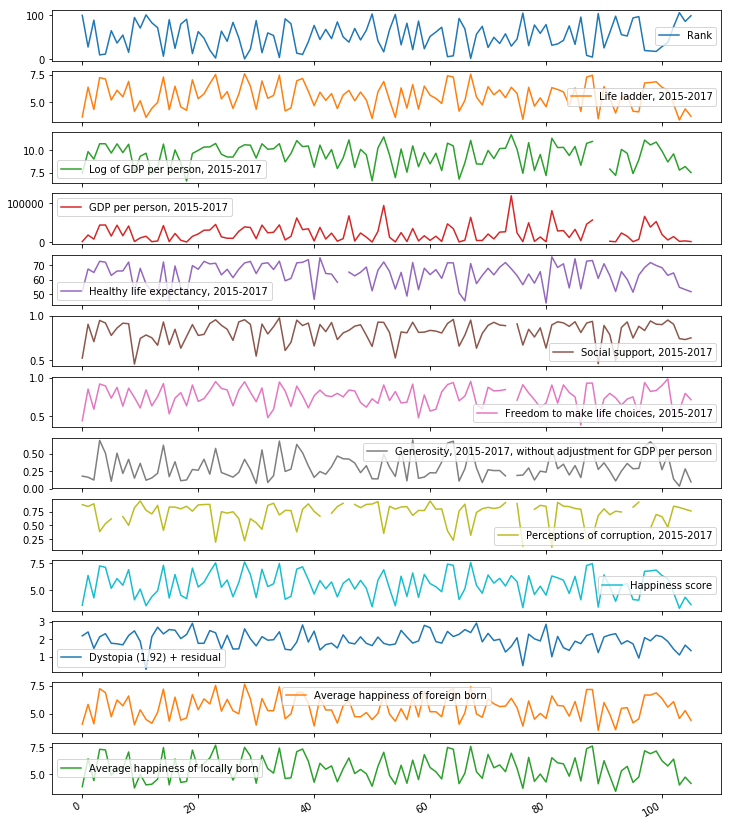

In [117]:
df = Main_Data[[
       'Rank',
       'Life ladder, 2015-2017',
       'Log of GDP per person, 2015-2017', 
       'GDP per person, 2015-2017',
       'Healthy life expectancy, 2015-2017', 
       'Social support, 2015-2017',
       'Freedom to make life choices, 2015-2017',
       'Generosity, 2015-2017, without adjustment for GDP per person',
       'Perceptions of corruption, 2015-2017',
       'Happiness score',
       'Dystopia (1.92) + residual',
       'Average happiness of foreign born',
       'Average happiness of locally born'
        ]]
df.plot(subplots=True, figsize=(12, 16));

## Basic Analysis of the Indicators

C:\Users\tkjie\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.

C:\Users\tkjie\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



<Figure size 864x864 with 0 Axes>

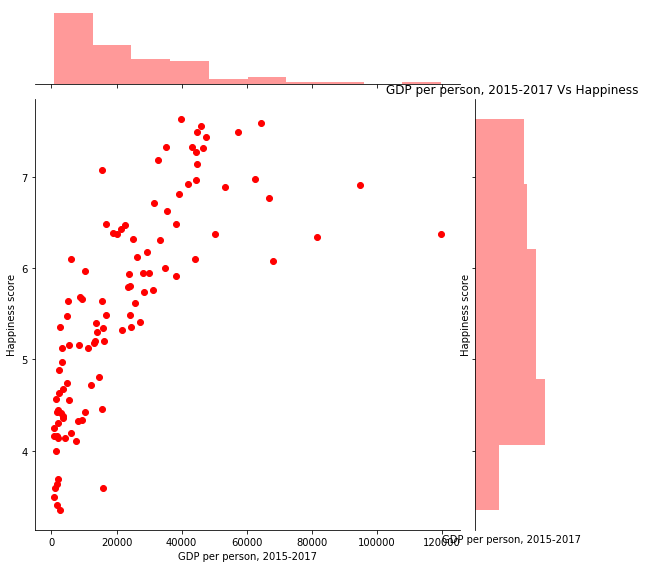

In [118]:
plt.figure(figsize=(12,12))
sb.jointplot(x = 'GDP per person, 2015-2017', y = 'Happiness score', data = df, size=8, color='red')
plt.ylabel('Happiness score')
plt.xlabel('GDP per person, 2015-2017')
plt.title('GDP per person, 2015-2017 Vs Happiness')
plt.show()

In [119]:
print("Comparing between GDP per capita and Average Happiness of Foreigners")
trace = go.Scatter(
    x = df['GDP per person, 2015-2017'],
    y = df['Average happiness of foreign born'],
    mode = 'markers'
)
data = [trace]
# Plot and embed in ipython notebook!
iplot(data)

Comparing between GDP per capita and Average Happiness of Foreigners


In [120]:
print("Comparing between GDP per capita and Average Happiness of Locals")
trace = go.Scatter(
    x = df['GDP per person, 2015-2017'],
    y = df['Average happiness of locally born'],
    mode = 'markers'
)
data = [trace]
# Plot and embed in ipython notebook!
iplot(data)

Comparing between GDP per capita and Average Happiness of Locals


From the gradient plot below, it seems that individuals with lower income are more happy than individuals with higher income.

In [218]:
print("Comparing between GDP per capita and Happiness Score")
x = df['Happiness score']
y = df['GDP per person, 2015-2017']
iplot([go.Histogram2dContour(x=x, y=y, contours=dict(coloring='heatmap')),
       go.Scatter(x=x, y=y, mode='markers', marker=dict(color='white', size=3, opacity=0.3))], show_link=False)

Comparing between GDP per capita and Happiness Score


In [122]:
print("Comparing between GDP per capita and Perceptions of corruption")
trace = go.Scatter(
    x = df['GDP per person, 2015-2017'],
    y = df['Perceptions of corruption, 2015-2017'],
    mode = 'markers')
data = [trace]
# Plot and embed in ipython notebook!
iplot(data)

Comparing between GDP per capita and Perceptions of corruption


In [123]:
print("Comparing between Life Expectancy and Social Support")
trace = go.Scatter(
    x = df['Healthy life expectancy, 2015-2017'],
    y = df['Social support, 2015-2017'],
    mode = 'markers')
data = [trace]
# Plot and embed in ipython notebook!
iplot(data)

Comparing between Life Expectancy and Social Support


## WHR Annual Analysis - In the United States

In [126]:
for i in range(2007, 2018):
    print('Data_' + str(i) + " = pd.DataFrame(d1[(d1['year'] == " + str(i) + ")])")

Data_2007 = pd.DataFrame(d1[(d1['year'] == 2007)])
Data_2008 = pd.DataFrame(d1[(d1['year'] == 2008)])
Data_2009 = pd.DataFrame(d1[(d1['year'] == 2009)])
Data_2010 = pd.DataFrame(d1[(d1['year'] == 2010)])
Data_2011 = pd.DataFrame(d1[(d1['year'] == 2011)])
Data_2012 = pd.DataFrame(d1[(d1['year'] == 2012)])
Data_2013 = pd.DataFrame(d1[(d1['year'] == 2013)])
Data_2014 = pd.DataFrame(d1[(d1['year'] == 2014)])
Data_2015 = pd.DataFrame(d1[(d1['year'] == 2015)])
Data_2016 = pd.DataFrame(d1[(d1['year'] == 2016)])
Data_2017 = pd.DataFrame(d1[(d1['year'] == 2017)])


In [127]:
Data_2008 = pd.DataFrame(d1[(d1['year'] == 2008)])
Data_2009 = pd.DataFrame(d1[(d1['year'] == 2009)])
Data_2010 = pd.DataFrame(d1[(d1['year'] == 2010)])
Data_2011 = pd.DataFrame(d1[(d1['year'] == 2011)])
Data_2012 = pd.DataFrame(d1[(d1['year'] == 2012)])
Data_2013 = pd.DataFrame(d1[(d1['year'] == 2013)])
Data_2014 = pd.DataFrame(d1[(d1['year'] == 2014)])
Data_2015 = pd.DataFrame(d1[(d1['year'] == 2015)])
Data_2016 = pd.DataFrame(d1[(d1['year'] == 2016)])
Data_2017 = pd.DataFrame(d1[(d1['year'] == 2017)])

In [128]:
# for i in range(2007, 2018):
#     print('print(Data_' + str(i) + ".shape)")

In [129]:
# print(Data_2008.shape)
# print(Data_2009.shape)
# print(Data_2010.shape)
# print(Data_2011.shape)
# print(Data_2012.shape)
# print(Data_2013.shape)
# print(Data_2014.shape)
# print(Data_2015.shape)
# print(Data_2016.shape)
# print(Data_2017.shape)

In [130]:
for i in range(2007, 2018):
    print('US_' + str(i) + "_Data = pd.DataFrame(Data_" + str(i) + "[(Data_" + str(i) + "['Country'] == 'United States')])")

US_2007_Data = pd.DataFrame(Data_2007[(Data_2007['Country'] == 'United States')])
US_2008_Data = pd.DataFrame(Data_2008[(Data_2008['Country'] == 'United States')])
US_2009_Data = pd.DataFrame(Data_2009[(Data_2009['Country'] == 'United States')])
US_2010_Data = pd.DataFrame(Data_2010[(Data_2010['Country'] == 'United States')])
US_2011_Data = pd.DataFrame(Data_2011[(Data_2011['Country'] == 'United States')])
US_2012_Data = pd.DataFrame(Data_2012[(Data_2012['Country'] == 'United States')])
US_2013_Data = pd.DataFrame(Data_2013[(Data_2013['Country'] == 'United States')])
US_2014_Data = pd.DataFrame(Data_2014[(Data_2014['Country'] == 'United States')])
US_2015_Data = pd.DataFrame(Data_2015[(Data_2015['Country'] == 'United States')])
US_2016_Data = pd.DataFrame(Data_2016[(Data_2016['Country'] == 'United States')])
US_2017_Data = pd.DataFrame(Data_2017[(Data_2017['Country'] == 'United States')])


In [131]:
US_2008_Data = pd.DataFrame(Data_2008[(Data_2008['Country'] == 'United States')])
US_2009_Data = pd.DataFrame(Data_2009[(Data_2009['Country'] == 'United States')])
US_2010_Data = pd.DataFrame(Data_2010[(Data_2010['Country'] == 'United States')])
US_2011_Data = pd.DataFrame(Data_2011[(Data_2011['Country'] == 'United States')])
US_2012_Data = pd.DataFrame(Data_2012[(Data_2012['Country'] == 'United States')])
US_2013_Data = pd.DataFrame(Data_2013[(Data_2013['Country'] == 'United States')])
US_2014_Data = pd.DataFrame(Data_2014[(Data_2014['Country'] == 'United States')])
US_2015_Data = pd.DataFrame(Data_2015[(Data_2015['Country'] == 'United States')])
US_2016_Data = pd.DataFrame(Data_2016[(Data_2016['Country'] == 'United States')])
US_2017_Data = pd.DataFrame(Data_2017[(Data_2017['Country'] == 'United States')])

In [132]:
# for i in range(2008, 2018):
#     print('(US_' + str(i) + "_Data['Life Ladder']), ")

In [133]:
# print(US_2008_Data['Life Ladder'])
# print(US_2009_Data['Life Ladder'])
# print(US_2010_Data['Life Ladder'])
# print(US_2011_Data['Life Ladder'])
# print(US_2012_Data['Life Ladder'])
# print(US_2013_Data['Life Ladder'])
# print(US_2014_Data['Life Ladder'])
# print(US_2015_Data['Life Ladder'])
# print(US_2016_Data['Life Ladder'])
# print(US_2017_Data['Life Ladder'])

In [134]:
US_Data =  pd.DataFrame(d1[(d1['Country'] == "United States")])
print("(No. of countries, No. of columns) =", US_Data.shape)

(No. of countries, No. of columns) = (12, 19)


In [135]:
US_Data = US_Data[['year', 'Life Ladder']]
US_Data_LL = list(US_Data['Life Ladder'])
US_Data
# US_Data.sort_values(by = 'Life Ladder', ascending = False)

,year,Life Ladder
1471,2006,7.181794
1472,2007,7.512688
1473,2008,7.280386
1474,2009,7.158032
1475,2010,7.163616
1476,2011,7.115139
1477,2012,7.026227
1478,2013,7.249285
1479,2014,7.151114
1480,2015,6.863947


In [136]:
# Create a trace
trace = go.Scatter(
    x = US_Data['year'],
    y = US_Data['Life Ladder'])
data = [trace]
iplot(data)

In [176]:
x = np.array(tuple(range(2006,2018)))
y = np.array([7.1817941472, 7.5126881473, 7.2803861474, 7.1580321475, 7.1636161476, 7.1151391477, 7.0262271478, 7.2492851479,
              7.1511141480, 6.8639471481, 6.8036001482, 6.991759])
z = np.polyfit(x, y, 5)
f = np.poly1d(z)
x_new = np.linspace(0, 10, 50)

C:\Users\tkjie\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RankWarning:

Polyfit may be poorly conditioned



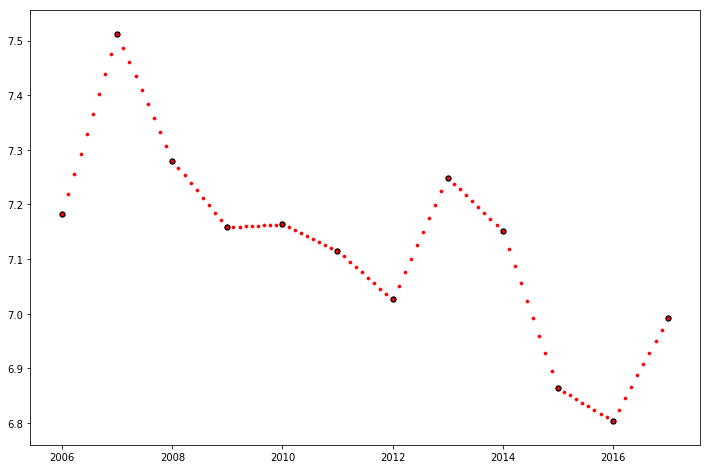

In [175]:
x = np.array(tuple(range(2006,2018)))
y = np.array([7.1817941472, 7.5126881473, 7.2803861474, 7.1580321475, 7.1636161476, 7.1151391477, 7.0262271478, 7.2492851479,
              7.1511141480, 6.8639471481, 6.8036001482, 6.991759])

t = np.linspace(0, 1, len(x))
t2 = np.linspace(0, 1, 100)

# One-dimensional linear interpolation.
x2 = np.interp(t2, t, x)
y2 = np.interp(t2, t, y)

# Plot x,y data
plt.figure(figsize=(12,8))
plt.scatter(x, y, marker='o', color='k', s=40, lw=0.)
plt.scatter(x2, y2, marker='o', color='r', s=10, lw=0.5)

In [187]:
# x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
# y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
# z = np.polyfit(x, y, 3)
# z

x = np.array(tuple(range(1,13)))
y = np.array([7.1817941472, 7.5126881473, 7.2803861474, 7.1580321475, 7.1636161476, 7.1151391477, 7.0262271478, 7.2492851479,
              7.1511141480, 6.8639471481, 6.8036001482, 6.991759])
z = np.polyfit(x, y, 5)
f = np.poly1d(z)
x_new = np.linspace(0, 10, 50)
y_new = f(x_new)
print("The interpolated y-values are:\n", y_new)
print("Total:", len(y_new), "datapoints generated for this specific diagram.")
trace1 = go.Scatter(
    x=x,
    y=y,
    mode='markers',
    name='Data',
    marker=dict(
        size=12))
trace2 = go.Scatter(
    x=x_new,
    y=y_new,
    mode='lines',
    name='Fit')
annotation = go.Annotation(
    x=1,
    y=1,
#     text='$0.43X^3 - 0.56X^2 + 16.78X + 10.61$',
    showarrow=False)
layout = go.Layout(
    title='Polynomial Fit in Python',
    annotations=[annotation]
)
data = [trace1, trace2]
fig = go.Figure(data=data, layout=layout)
iplot(fig)

The interpolated y-values are:
 [5.97711795 6.33797028 6.63387861 6.87241723 7.06062224 7.20500941
 7.3115921  7.38589918 7.43299287 7.45748666 7.46356322 7.45499225
 7.43514843 7.40702928 7.37327304 7.33617659 7.29771336 7.25955118
 7.2230702  7.18938077 7.15934135 7.13357642 7.1124943  7.09630514
 7.08503876 7.07856253 7.07659931 7.07874531 7.08448801 7.093224
 7.10427696 7.11691549 7.13037099 7.14385563 7.15658017 7.1677719
 7.17669249 7.18265594 7.18504643 7.18333622 7.17710357 7.16605061
 7.15002122 7.12901898 7.103225   7.07301584 7.03898143 7.00194293
 6.96297061 6.9234018 ]
Total: 50 datapoints generated


In [190]:
x_new_1yr = np.linspace(0, 10, 365*12)
y_new_1yr = f(x_new_1yr)
print("The interpolated y-values are:\n", y_new_1yr)
print("Total:", len(y_new_1yr), "datapoints generated")

The interpolated y-values are:
 [5.97711795 5.98154438 5.98596169 ... 6.92428271 6.9238422  6.9234018 ]
Total: 4380 datapoints generated


In [193]:
Values_for_1yr = pd.DataFrame({'Daily Life Ladder': y_new_1yr})
Values_for_1yr.tail()

,Daily Life Ladder
4375,6.925164
4376,6.924723
4377,6.924283
4378,6.923842
4379,6.923402


In [229]:
import plotly.figure_factory as ff

## WHR Life Ladder Analysis in Different Regions
Let's look at the life ladder results, or also known as the main Happiness results across the other regions. There are in total 10 regions classified in the dataframe.

First, a look at life ladder results in the world.

10
(106, 33) 

Sub-Saharan Africa                    24
Western Europe                        20
Central and Eastern Europe            14
Middle East and North Africa          14
Commonwealth of Independent States    12
Latin America and Caribbean           10
South Asia                             4
North America and ANZ                  4
East Asia                              2
Southeast Asia                         2
Name: Region indicator, dtype: int64


[Text(0, 0, 'South Asia'),
 Text(0, 0, 'Latin America and Caribbean'),
 Text(0, 0, 'Commonwealth of Independent States'),
 Text(0, 0, 'North America and ANZ'),
 Text(0, 0, 'Western Europe'),
 Text(0, 0, 'Middle East and North Africa'),
 Text(0, 0, 'Sub-Saharan Africa'),
 Text(0, 0, 'Central and Eastern Europe'),
 Text(0, 0, 'East Asia'),
 Text(0, 0, 'Southeast Asia')]

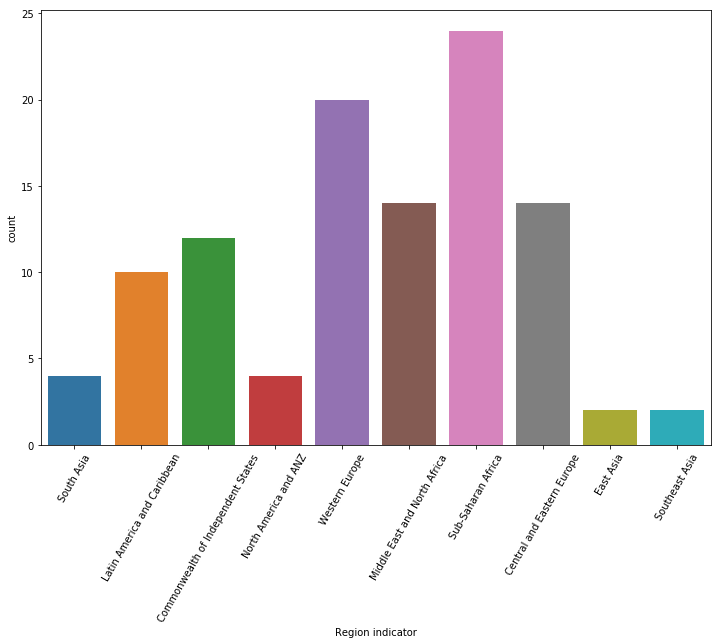

In [197]:
print(len(Main_Data["Region indicator"].unique()))
# print(Main_Data.shape, "\n")
print(Main_Data['Region indicator'].value_counts())
plt.figure(figsize=(12,8))
sb.countplot(Main_Data['Region indicator']).set_xticklabels(labels=Main_Data['Region indicator'].unique(), rotation=60)

#### World Analysis of Life Ladder

In [207]:
Boxplot_of_Life_Ladder = go.Box(x=Main_Data["Life ladder, 2015-2017"])
data = [Boxplot_of_Life_Ladder]
iplot(data)

In [226]:
SubSaharan_Data = pd.DataFrame(Main_Data[Main_Data['Region indicator'] == 'Sub-Saharan Africa'])
print("(No. of countries, No. of columns) =", SubSaharan_Data.shape)
American_Data = pd.DataFrame(Main_Data[Main_Data['Region indicator'] == 'North America and ANZ'])
print("(No. of countries, No. of columns) =", American_Data.shape)
WesternEurope_Data = pd.DataFrame(Main_Data[Main_Data['Region indicator'] == 'Western Europe'])
print("(No. of countries, No. of columns) =", WesternEurope_Data.shape)
CentralandEasternEurope_Data = pd.DataFrame(Main_Data[Main_Data['Region indicator'] == 'Central and Eastern Europe'])
print("(No. of countries, No. of columns) =", CentralandEasternEurope_Data.shape)
MiddleEastandNorthAfrica_Data = pd.DataFrame(Main_Data[Main_Data['Region indicator'] == 'Middle East and North Africa'])
print("(No. of countries, No. of columns) =", MiddleEastandNorthAfrica_Data.shape)
CIS_Data = pd.DataFrame(Main_Data[Main_Data['Region indicator'] == 'Commonwealth of Independent States'])
print("(No. of countries, No. of columns) =", CIS_Data.shape)
LatinAmericaandCaribbean_Data = pd.DataFrame(Main_Data[Main_Data['Region indicator'] == 'Latin America and Caribbean'])
print("(No. of countries, No. of columns) =", LatinAmericaandCaribbean_Data.shape)
SouthAsia_Data = pd.DataFrame(Main_Data[Main_Data['Region indicator'] == 'South Asia'])
print("(No. of countries, No. of columns) =", SouthAsia_Data.shape)
EastAsiaData = pd.DataFrame(Main_Data[Main_Data['Region indicator'] == 'East Asia'])
print("(No. of countries, No. of columns) =", EastAsiaData.shape)
SoutheastAsia_Data = pd.DataFrame(Main_Data[Main_Data['Region indicator'] == 'Southeast Asia'])
print("(No. of countries, No. of columns) =", SoutheastAsia_Data.shape)

(No. of countries, No. of columns) = (24, 33)
(No. of countries, No. of columns) = (4, 33)
(No. of countries, No. of columns) = (20, 33)
(No. of countries, No. of columns) = (14, 33)
(No. of countries, No. of columns) = (14, 33)
(No. of countries, No. of columns) = (12, 33)
(No. of countries, No. of columns) = (10, 33)
(No. of countries, No. of columns) = (4, 33)
(No. of countries, No. of columns) = (2, 33)
(No. of countries, No. of columns) = (2, 33)


In [227]:
trace0 = go.Box(x=SubSaharan_Data["Life ladder, 2015-2017"], name='SS Africa')
trace1 = go.Box(x=American_Data["Life ladder, 2015-2017"], name='US & ANZ')
trace2 = go.Box(x=WesternEurope_Data["Life ladder, 2015-2017"], name='West Euro')
trace3 = go.Box(x=CentralandEasternEurope_Data["Life ladder, 2015-2017"], name='Cent. & East Euro')
trace4 = go.Box(x=MiddleEastandNorthAfrica_Data["Life ladder, 2015-2017"], name='Mid East & Africa')
trace5 = go.Box(x=CIS_Data["Life ladder, 2015-2017"], name='CIS')
trace6 = go.Box(x=LatinAmericaandCaribbean_Data["Life ladder, 2015-2017"], name='South America')
trace7 = go.Box(x=SouthAsia_Data["Life ladder, 2015-2017"], name='South Asia')
trace8 = go.Box(x=EastAsiaData["Life ladder, 2015-2017"], name='East Asia')
trace9 = go.Box(x=SoutheastAsia_Data["Life ladder, 2015-2017"], name='SEA')

data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9]
iplot(data)

In [237]:
hist_data = [MiddleEastandNorthAfrica_Data["Life ladder, 2015-2017"], American_Data["Life ladder, 2015-2017"],
             American_Data["Life ladder, 2015-2017"], CentralandEasternEurope_Data["Life ladder, 2015-2017"]]
group_labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)

# Plot!
iplot(fig)

In [236]:
x = SubSaharan_Data["Life ladder, 2015-2017"]
hist_data = [x]
group_labels = ['distplot']
fig = ff.create_distplot(hist_data, group_labels)
iplot(fig)

Let's analyse a specific region. The Middle Eastern region, where there are 14 countries in total.

In [217]:
# # Create traces
# trace0 = go.Scatter(
#     x = data_Rank,
#     y = data['Rank'],
#     mode = 'lines',
#     name = 'lines'
# )
# iplot(trace0)

In [ ]:
# data_Rank = data['Rank']